<a href="https://colab.research.google.com/github/ahatasham5/Breast_Cancer_Prognosis/blob/main/test_eff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#007BA7;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b> Import Modules</p></div>

In [1]:
!pip install efficientnet_pytorch

  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━

In [10]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split

In [11]:
import torch
import torchvision.models as models
from efficientnet_pytorch import EfficientNet
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split
from torch import nn, optim
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from torchvision.models.densenet import densenet121

In [13]:
# Load a pre-trained ResNet model
model = EfficientNet.from_pretrained('efficientnet-b0')

# Freeze all the parameters in the model
for param in model.parameters():
    param.requires_grad = False

# Replace the final fully connected layer
num_ftrs = model._fc.in_features
model._fc = nn.Linear(num_ftrs,1)

# Check if a GPU is available and move the model to GPU if it is
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

Loaded pretrained weights for efficientnet-b0


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
ls

'Biglycan breast cancer dataset'/   model_checkpoint_alexnet.pth   model_checkpoint_eff.pth


In [16]:
%cd /content/drive/MyDrive/CSE/

/content/drive/MyDrive/CSE


In [17]:
ls

'Biglycan breast cancer dataset'/   model_checkpoint_alexnet.pth   model_checkpoint_eff.pth


In [18]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to 224x224 for ResNet
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalization for ResNet
])

# Load your dataset
dataset = datasets.ImageFolder("Biglycan breast cancer dataset", transform=transform)

# Splitting dataset into train and validation
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [19]:
ls

'Biglycan breast cancer dataset'/   model_checkpoint_alexnet.pth   model_checkpoint_eff.pth


In [20]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model._fc.parameters(), lr=0.001)

In [ ]:
ls

'Biglycan breast cancer dataset'/   model_checkpoint_alexnet.pth


In [21]:
import torch

# Define the checkpoint file path
checkpoint_path = 'model_checkpoint_eff.pth'

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1).type_as(outputs))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

    # Save the checkpoint after each epoch
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': running_loss / len(train_loader)
    }, checkpoint_path)

Epoch 1, Loss: 0.6674839125739204
Epoch 2, Loss: 0.6031270490752326
Epoch 3, Loss: 0.5557456413904825
Epoch 4, Loss: 0.5118759539392259
Epoch 5, Loss: 0.49388309319814044
Epoch 6, Loss: 0.4629511601395077
Epoch 7, Loss: 0.43976744016011554
Epoch 8, Loss: 0.430912842353185
Epoch 9, Loss: 0.43748114506403607
Epoch 10, Loss: 0.39953699376848006
Epoch 11, Loss: 0.3961477213435703
Epoch 12, Loss: 0.3928907877869076
Epoch 13, Loss: 0.35431871480411953
Epoch 14, Loss: 0.3900063832600911
Epoch 15, Loss: 0.33446841438611347
Epoch 16, Loss: 0.33904869688881767
Epoch 17, Loss: 0.34276100662019515
Epoch 18, Loss: 0.33133505781491596
Epoch 19, Loss: 0.3213612304793464
Epoch 20, Loss: 0.3390285571416219
Epoch 21, Loss: 0.3319825960530175
Epoch 22, Loss: 0.2786524064011044
Epoch 23, Loss: 0.2916530768076579
Epoch 24, Loss: 0.28031251496738857
Epoch 25, Loss: 0.2853867775864071
Epoch 26, Loss: 0.2748694039053387
Epoch 27, Loss: 0.3089437368843291
Epoch 28, Loss: 0.2917310396830241
Epoch 29, Loss: 0.26

In [22]:
ls

'Biglycan breast cancer dataset'/   model_checkpoint_alexnet.pth   model_checkpoint_eff.pth


In [23]:
import torch

# Define the checkpoint file path
checkpoint_path = 'model_checkpoint_eff.pth'

# Load the checkpoint
checkpoint = torch.load(checkpoint_path)
start_epoch = checkpoint['epoch'] + 1
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
loss = checkpoint['loss']

print(f"Resuming training from epoch {start_epoch}, with loss: {loss}")

num_epochs = 100
for epoch in range(start_epoch, num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1).type_as(outputs))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

    # Save the checkpoint after each epoch
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': running_loss / len(train_loader)
    }, checkpoint_path)

Resuming training from epoch 100, with loss: 0.13438912481069565


In [24]:
import torch

# Load the saved model weights
model.load_state_dict(torch.load('model_.pth'))

FileNotFoundError: [Errno 2] No such file or directory: 'model_.pth'

In [25]:
import torch

# Load the checkpoint
checkpoint = torch.load('model_checkpoint_eff.pth')
model.load_state_dict(checkpoint['model_state_dict'])

# Optionally, you can also load the optimizer state and other saved data
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']

In [26]:
model.eval()  # Set model to evaluation mode
all_preds = []
all_targets = []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        preds = torch.sigmoid(outputs) > 0.5
        all_preds.extend(preds.cpu().numpy())
        all_targets.extend(labels.cpu().numpy())

# Calculate and print the evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(all_targets, np.array(all_preds).flatten()))

print("\nClassification Report:")
print(classification_report(all_targets, np.array(all_preds).flatten(), target_names=['Healthy', 'Cancerous']))


Confusion Matrix:
[[36  5]
 [ 4 23]]

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.90      0.88      0.89        41
   Cancerous       0.82      0.85      0.84        27

    accuracy                           0.87        68
   macro avg       0.86      0.86      0.86        68
weighted avg       0.87      0.87      0.87        68



In [27]:
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)

        # Apply sigmoid since we used BCEWithLogitsLoss
        predicted_probs = torch.sigmoid(outputs)

        # Convert probabilities to predicted class (0 or 1)
        predicted = predicted_probs > 0.5

        total += labels.size(0)
        correct += (predicted.flatten() == labels).sum().item()

accuracy = correct / total
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 86.76%


Confusion Matrix:
[[36  5]
 [ 4 23]]

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.90      0.88      0.89        41
   Cancerous       0.82      0.85      0.84        27

    accuracy                           0.87        68
   macro avg       0.86      0.86      0.86        68
weighted avg       0.87      0.87      0.87        68


Accuracy: 86.76%
AUC: 0.95
Precision: 0.82
Recall: 0.85
F1-Score: 0.84


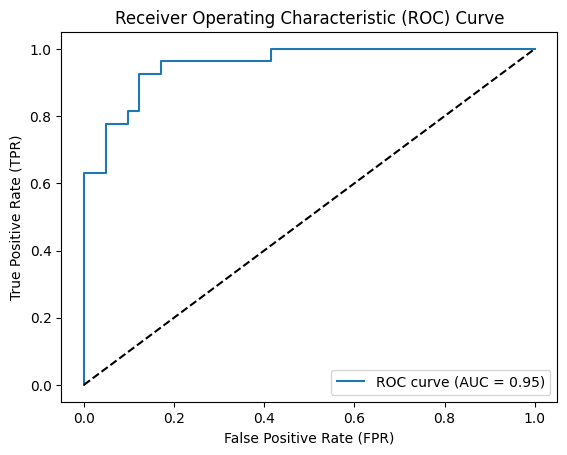

In [28]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split
import torchvision.models as models
from torch import nn, optim
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# ... (Previous code for model setup, training, and loading checkpoint)

# Evaluation
model.eval()  # Set the model to evaluation mode
all_preds = []
all_targets = []
all_probs = []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        probs = torch.sigmoid(outputs)  # Get probabilities
        preds = (probs > 0.5).float()  # Convert probabilities to predictions
        all_preds.extend(preds.cpu().numpy())
        all_targets.extend(labels.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

# Calculate and print the evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(all_targets, np.array(all_preds).flatten()))

print("\nClassification Report:")
report = classification_report(all_targets, np.array(all_preds).flatten(), target_names=['Healthy', 'Cancerous'], output_dict=True)
print(classification_report(all_targets, np.array(all_preds).flatten(), target_names=['Healthy', 'Cancerous']))

# Extract precision, recall, and F1-score from the classification report
precision = report['Cancerous']['precision']
recall = report['Cancerous']['recall']
f1_score = report['Cancerous']['f1-score']

accuracy = np.sum(np.array(all_preds).flatten() == np.array(all_targets).flatten()) / len(all_targets)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

auc = roc_auc_score(all_targets, np.array(all_probs).flatten())
print(f"AUC: {auc:.2f}")

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(all_targets, np.array(all_probs).flatten())
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random prediction line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()